<a href="https://colab.research.google.com/github/meriem-belkacemi/SIC/blob/master/Deep_Feed_Forward_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
df = pd.read_csv('/content/bank.csv')

In [15]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [16]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [17]:
df.shape

(11162, 17)

In [18]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [19]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
for x in df.columns :
  r=df[x].value_counts()
  print (f'The column is :',x)
  print (r)
  print ("\n\n")

# Visualization

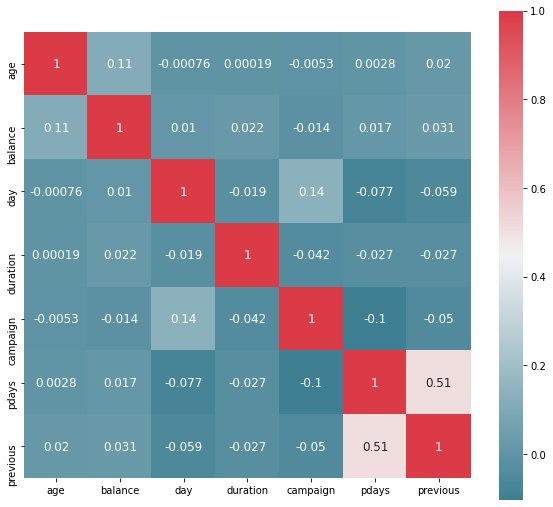

In [21]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 10 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap( corr, cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 } )
plot_correlation_map(df)

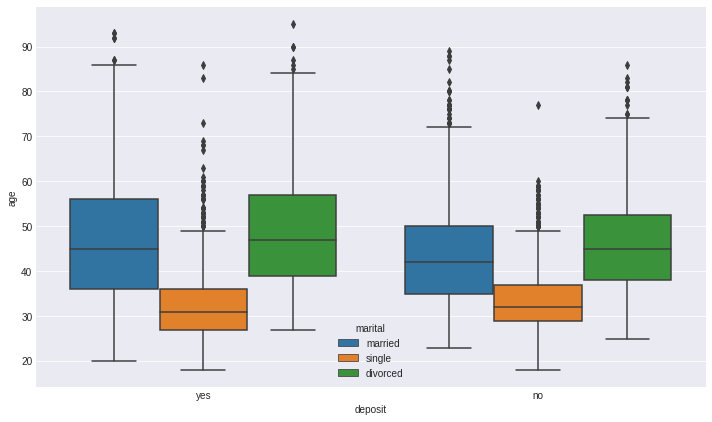

In [25]:
fig=plt.figure(figsize=(12,7))   
sns.boxplot(x="deposit", y="age", hue="marital", data=df)
plt.show()

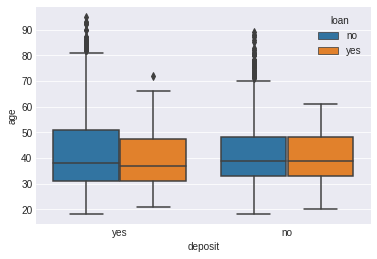

In [26]:
sns.boxplot(x="deposit", y="age", hue="loan", data=df)

plt.show()

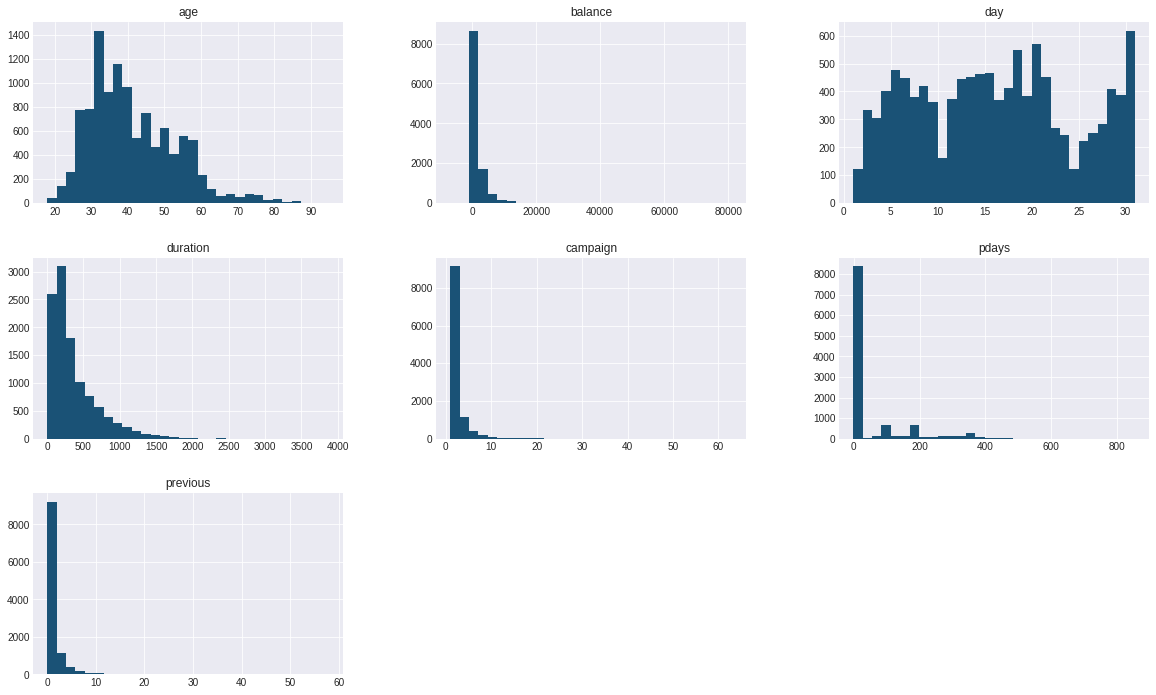

In [22]:
plt.style.use('seaborn-darkgrid')
df.hist(bins=30, figsize=(20,12), color='#1A5276')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


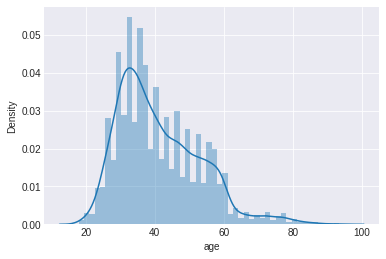

In [23]:
sns.distplot(df['age'] , kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


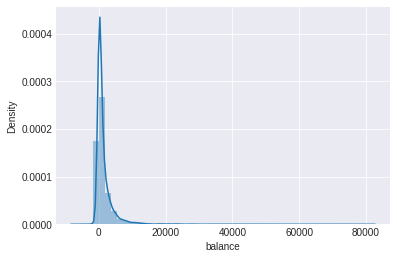

In [24]:
sns.distplot(df['balance'] , kde=True)

In [27]:
#splitting the date into catg/num 
cols = df.columns 
num_cols= df._get_numeric_data().columns 
cat_cols = list(set(cols) - set(num_cols))

In [28]:
df_encod = df[cat_cols].apply(LabelEncoder().fit_transform)

In [29]:
new_df = df_encod.join(df[num_cols])
new_df.head()

,education,job,loan,default,deposit,housing,month,poutcome,contact,marital,age,balance,day,duration,campaign,pdays,previous
0,1,0,0,0,1,1,8,3,2,1,59,2343,5,1042,1,-1,0
1,1,0,0,0,1,0,8,3,2,1,56,45,5,1467,1,-1,0
2,1,9,0,0,1,1,8,3,2,1,41,1270,5,1389,1,-1,0
3,1,7,0,0,1,1,8,3,2,1,55,2476,5,579,1,-1,0
4,2,0,0,0,1,0,8,3,2,1,54,184,5,673,2,-1,0


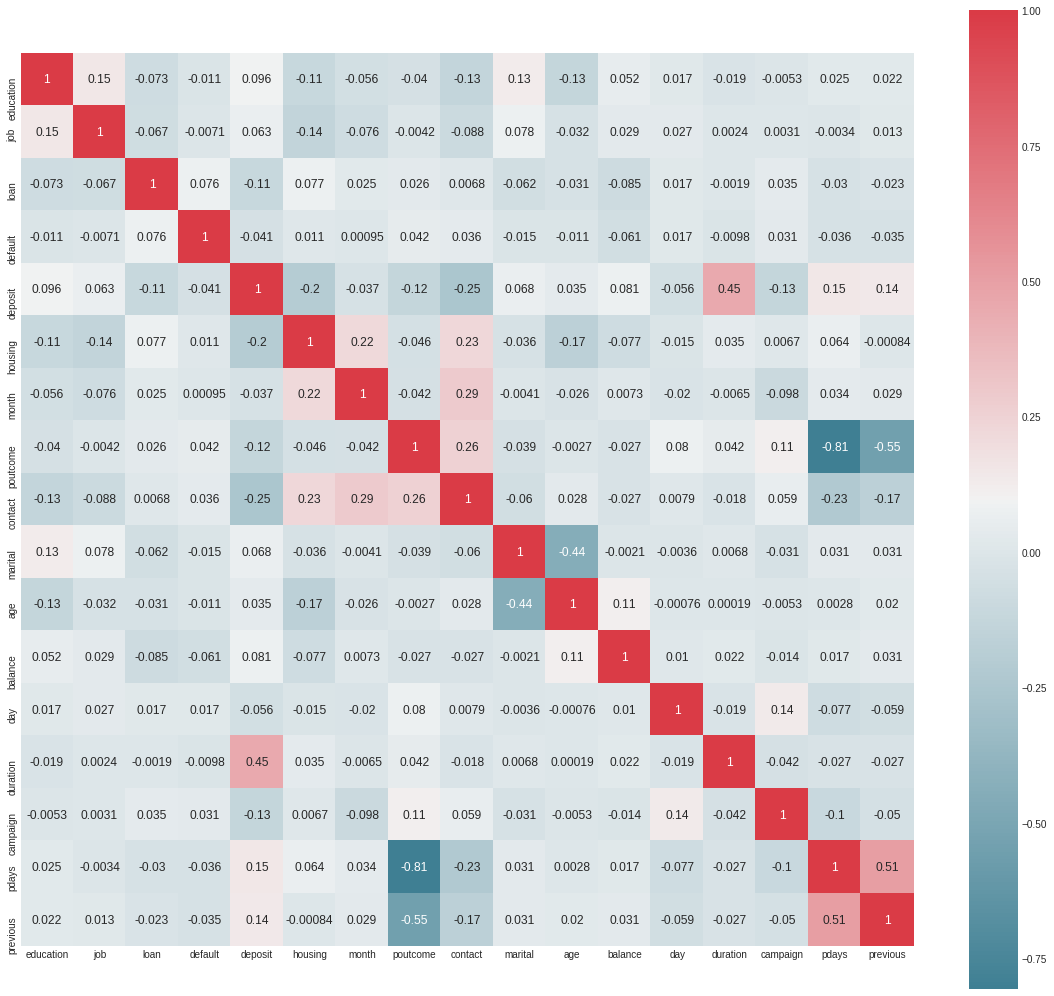

In [30]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 20 , 20 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap( corr, cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 } )
plot_correlation_map(new_df)

In [31]:
cols= ['marital', 'month', 'contact', 'education', 'default',
       'loan', 'housing', 'job', 'poutcome', 'age', 'balance', 'day',
       'duration', 'campaign', 'pdays', 'previous']

In [32]:
X=new_df[cols]
Y=new_df['deposit']

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [34]:
model = Sequential()
model.add(Dense(32 , input_dim = 16 , activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1 , activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                544       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 2,721
Trainable params: 2,721
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

In [36]:
history = model.fit(x_test , y_test , epochs=20 , validation_split=0.2)

Epoch 1/20
56/56 [==============================] - 1s 6ms/step - loss: 16.4765 - accuracy: 0.5353 - val_loss: 2.1310 - val_accuracy: 0.6667
Epoch 2/20
56/56 [==============================] - 0s 3ms/step - loss: 2.4109 - accuracy: 0.6691 - val_loss: 1.6369 - val_accuracy: 0.6890
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 2.3239 - accuracy: 0.6562 - val_loss: 3.3012 - val_accuracy: 0.6801
Epoch 4/20
56/56 [==============================] - 0s 3ms/step - loss: 2.8389 - accuracy: 0.6517 - val_loss: 2.1262 - val_accuracy: 0.6465
Epoch 5/20
56/56 [==============================] - 0s 2ms/step - loss: 2.7187 - accuracy: 0.6534 - val_loss: 4.5866 - val_accuracy: 0.6711
Epoch 6/20
56/56 [==============================] - 0s 3ms/step - loss: 1.9702 - accuracy: 0.6853 - val_loss: 1.7186 - val_accuracy: 0.7159
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 2.2568 - accuracy: 0.6775 - val_loss: 3.8407 - val_accuracy: 0.6577
Epoch 8/20
56/56 [=

In [37]:
model.evaluate(x_test , y_test)

70/70 [==============================] - 0s 1ms/step - loss: 2.4291 - accuracy: 0.7259


[2.429063320159912, 0.7259292602539062]

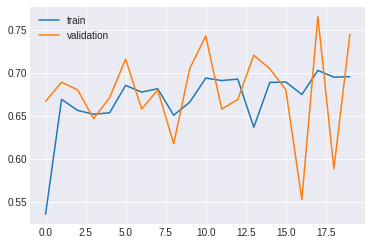

In [38]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'validation'], loc='upper left')
plt.show()